<a href="https://colab.research.google.com/github/swarali0308/Final_Project/blob/main/Chennai_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chennai House Price Prediction
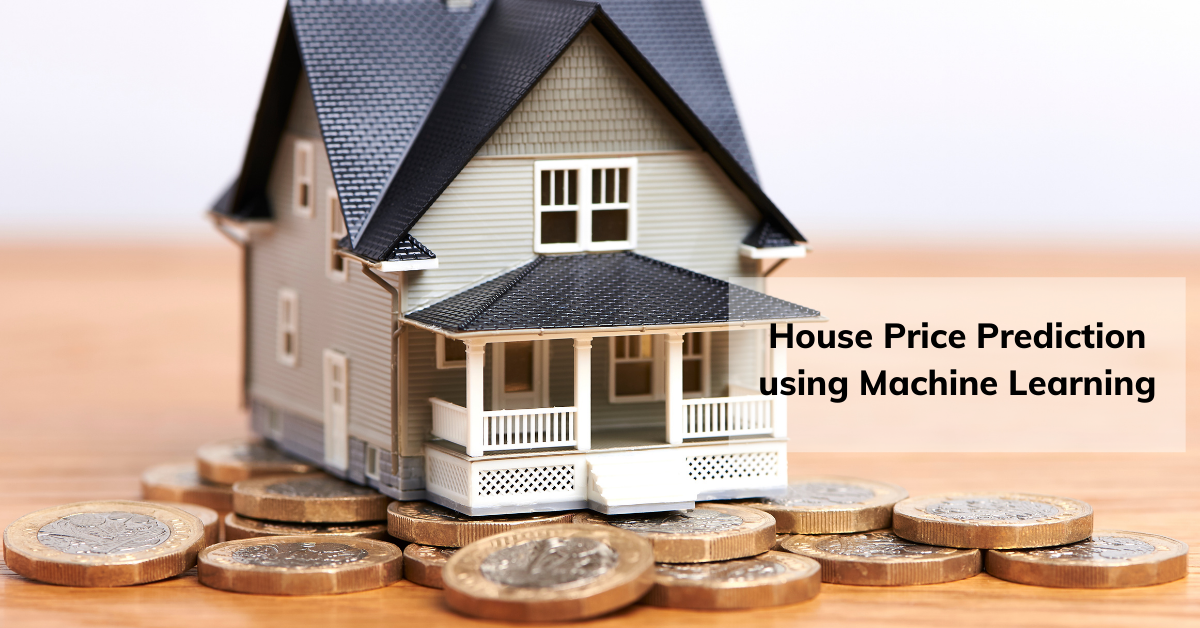

**Problem Statement**

Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?

**Importing the libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

**Loading the dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df=pd.read_csv('/content/drive/MyDrive/dataset/train-chennai-sale.csv')

In [5]:
df.head()

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004  04-05-2011            131        1.0   
1  P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2  P01812       Adyar       909  04-02-2012             70        1.0   
3  P05346   Velachery      1855  13-03-2010             14        3.0   
4  P06210  Karapakkam      1226  05-10-2009             84        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  ... UTILITY_AVAIL  STREET MZZONE  \
0         1.0       3  AbNormal        Yes  ...        AllPub   Paved      A   
1         1.0       5  AbNormal         No  ...        AllPub  Gravel     RH   
2         1.0       3  AbNormal        Yes  ...           ELO  Gravel     RL   
3         2.0       5    Family         No  ...       NoSewr    Paved      I   
4         1.0       3  AbNormal        Yes  ...        AllPub  Gravel      C   

  QS_ROOMS QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  
0      4.0         3.9         4.9       4.330   380000  144400      7600000  
1      4.9         4.2         2.5       3.765   760122  304049     21717770  
2      4.1         3.8         2.2       3.090   421094   92114     13159200  
3      4.7         3.9         3.6       4.010   356321   77042      9630290  
4      3.0         2.5         4.1       3.290   237000   74063      7406250  

[5 rows x 22 columns]

In [6]:
df.shape

(7109, 22)

In [7]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [8]:
df.isna().any()

PRT_ID           False
AREA             False
INT_SQFT         False
DATE_SALE        False
DIST_MAINROAD    False
N_BEDROOM         True
N_BATHROOM        True
N_ROOM           False
SALE_COND        False
PARK_FACIL       False
DATE_BUILD       False
BUILDTYPE        False
UTILITY_AVAIL    False
STREET           False
MZZONE           False
QS_ROOMS         False
QS_BATHROOM      False
QS_BEDROOM       False
QS_OVERALL        True
REG_FEE          False
COMMIS           False
SALES_PRICE      False
dtype: bool

In [9]:
df.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

#Data Cleaning

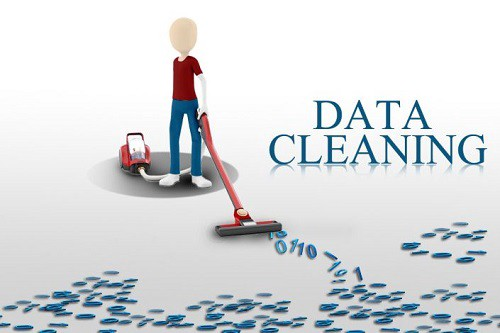

**PRT_ID**

PRT_ID column doesnot play any role in model building so we need to drop that column 

In [11]:
df.drop(['PRT_ID'],axis=1,inplace=True)
df.head()

AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
0  Karapakkam      1004  04-05-2011            131        1.0         1.0   
1  Anna Nagar      1986  19-12-2006             26        2.0         1.0   
2       Adyar       909  04-02-2012             70        1.0         1.0   
3   Velachery      1855  13-03-2010             14        3.0         2.0   
4  Karapakkam      1226  05-10-2009             84        1.0         1.0   

   N_ROOM SALE_COND PARK_FACIL  DATE_BUILD  ... UTILITY_AVAIL  STREET MZZONE  \
0       3  AbNormal        Yes  15-05-1967  ...        AllPub   Paved      A   
1       5  AbNormal         No  22-12-1995  ...        AllPub  Gravel     RH   
2       3  AbNormal        Yes  09-02-1992  ...           ELO  Gravel     RL   
3       5    Family         No  18-03-1988  ...       NoSewr    Paved      I   
4       3  AbNormal        Yes  13-10-1979  ...        AllPub  Gravel      C   

  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  
0      4.0          3.9         4.9       4.330   380000  144400      7600000  
1      4.9          4.2         2.5       3.765   760122  304049     21717770  
2      4.1          3.8         2.2       3.090   421094   92114     13159200  
3      4.7          3.9         3.6       4.010   356321   77042      9630290  
4      3.0          2.5         4.1       3.290   237000   74063      7406250  

[5 rows x 21 columns]

**Area**

In [12]:
df.AREA.value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

Above we can see that there are some spelling mistakes we need to work on that first

In [13]:
#for Chrompet
df.AREA[df['AREA'].isin(['Chrompt','Chrmpet','Chormpet'])]='Chrompet' 
#for Karapakkam    
df.AREA[df['AREA']=='Karapakam']='Karapakkam'
#for KK Nagar
df.AREA[df['AREA']=='KKNagar']='KK Nagar'
#for Velachery
df.AREA[df['AREA']=='Velchery']='Velachery'
#for Anna Nagar   
df.AREA[df['AREA'].isin(['Ana Nagar','Ann Nagar '])]='Anna Nagar'
#for Adyar
df.AREA[df['AREA']=='Adyr']='Adyar'
#for T Nagar  
df.AREA[df['AREA']=='TNagar']='T Nagar'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: Setti

In [14]:
df.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     786
Adyar          774
T Nagar        501
Ann Nagar        2
Name: AREA, dtype: int64

In [15]:
df['AREA']=df['AREA'].replace({
    'Ann Nagar':'Anna Nagar'
})

In [16]:
df.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

**INT_SQFT**

In [17]:
df.INT_SQFT .value_counts()

1781    18
1538    15
1505    13
1514    13
1634    12
        ..
559      1
2479     1
1330     1
880      1
598      1
Name: INT_SQFT, Length: 1699, dtype: int64

From above we can conclude that no cleaning or imputation is required for INT_SQFT column

**DATE_SALE**

We need to convert DATE_SALE to Datetime type


In [18]:
df['DATE_SALE']=pd.to_datetime(df['DATE_SALE'])

**DIST_MAINROAD**

In [19]:
df.DIST_MAINROAD.value_counts()

39     56
51     53
78     52
77     49
73     48
       ..
33     24
136    24
167    24
12     23
25     20
Name: DIST_MAINROAD, Length: 201, dtype: int64

From above we can conclude that no cleaning or imputation is required for DIST_MAINROAD column

**N_BEDROOM**

In [20]:
df[df['N_BEDROOM'].isnull()]

AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
4060  Anna Nagar      1556 2013-01-16            181        NaN         1.0   

      N_ROOM SALE_COND PARK_FACIL  DATE_BUILD  ... UTILITY_AVAIL     STREET  \
4060       4  Partiall         No  23-01-1986  ...       NoSewr   No Access   

     MZZONE QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  \
4060     RM      4.8          2.7         2.0       3.155   313136  107978   

      SALES_PRICE  
4060     10797790  

[1 rows x 21 columns]

One record is having NaN value we can fill it with median value

In [21]:
df.N_BEDROOM[df['N_BEDROOM'].isnull()]=df.N_BEDROOM.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**N_BATHROOM**

In [22]:
df[df['N_BATHROOM'].isnull()]

AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
70    Anna Nagar      1589 2010-03-22             39        1.0         NaN   
5087    Chrompet      1016 2012-02-08            105        1.0         NaN   
6134    Chrompet       916 2012-02-08            173        1.0         NaN   
6371    Chrompet      1035 2012-06-11             90        1.0         NaN   
6535  Anna Nagar      1864 2007-05-03            184        2.0         NaN   

      N_ROOM    SALE_COND PARK_FACIL  DATE_BUILD  ... UTILITY_AVAIL  \
70         4      Partial         No  02-04-1966  ...        AllPub   
5087       3     AbNormal        Yes  10-08-1980  ...       NoSewr    
6134       3  Normal Sale        Yes  12-08-1974  ...           ELO   
6371       3      Partial         No  14-11-1981  ...        NoSeWa   
6535       5       Family        Yes  07-03-1997  ...       NoSewr    

         STREET MZZONE QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  \
70       Gravel     RL      2.1          2.5         4.5        3.16   451857   
5087     Gravel     RM      3.2          4.2         2.0        3.24   330086   
6134      Paved     RL      3.4          3.5         3.0         NaN   265423   
6371  No Access     RM      2.3          3.5         3.2        3.05   223403   
6535      Paved     RM      3.3          3.7         4.7        3.96   575606   

      COMMIS  SALES_PRICE  
70     85486     12212350  
5087  106479     10647920  
6134   44237      8847420  
6371   24823      8274200  
6535  124455     15556920  

[5 rows x 21 columns]

As we can see there are five records with NaN values so we need to fill them with median


In [23]:
df.N_BATHROOM[df['N_BATHROOM'].isnull()]=df.N_BATHROOM.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**N_ROOM**

In [24]:
df[df['N_ROOM'].isna()]

Empty DataFrame
Columns: [AREA, INT_SQFT, DATE_SALE, DIST_MAINROAD, N_BEDROOM, N_BATHROOM, N_ROOM, SALE_COND, PARK_FACIL, DATE_BUILD, BUILDTYPE, UTILITY_AVAIL, STREET, MZZONE, QS_ROOMS, QS_BATHROOM, QS_BEDROOM, QS_OVERALL, REG_FEE, COMMIS, SALES_PRICE]
Index: []

[0 rows x 21 columns]

From above we can conclude that no cleaning or imputation is required for N_ROOM column

**SALE_COND**

In [25]:
df.SALE_COND.value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

Above we can see that there are some spelling mistakes we need to work on that first

In [26]:
#for Adj Land
df.SALE_COND[df['SALE_COND']=='AdjLand']='Adj Land'
#for Partial
df.SALE_COND[df['SALE_COND'].isin(['Partiall','PartiaLl'])]='Partial'
#for AbNormal
df.SALE_COND[df['SALE_COND']=='Ab Normal']='AbNormal'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
df.SALE_COND.value_counts()

Adj Land       1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

**PARK_FACIL**

In [28]:
df.PARK_FACIL.value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

Above we can see that there are some spelling mistakes we need to work on that first

In [29]:
#for No
df.PARK_FACIL[df['PARK_FACIL']=='Noo']='No'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
df.PARK_FACIL.value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

**DATE_BUILD**

We need to convert DATE_BUILD to Datetime type


In [31]:
df['DATE_BUILD']=pd.to_datetime(df['DATE_BUILD'])

**BUILDTYPE**

In [32]:
df.BUILDTYPE.value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

Above we can see that there are some spelling mistakes we need to work on that first


In [33]:
#for Commercial
df.BUILDTYPE[df['BUILDTYPE']=='Comercial']='Commercial'
#for Others
df.BUILDTYPE[df['BUILDTYPE']=='Other']='Others'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [34]:
df.BUILDTYPE.value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

**UTILITY_AVAIL**

In [35]:
df.UTILITY_AVAIL.value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

Above we can see that there are some spelling mistakes we need to work on that first

In [36]:
#for All Pub
df.UTILITY_AVAIL[df['UTILITY_AVAIL']=='AllPub']='All Pub'
#for NoSeWa
df.UTILITY_AVAIL[df['UTILITY_AVAIL']=='NoSewr']='NoSeWa'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [37]:
df.UTILITY_AVAIL.value_counts()

All Pub    1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

In [38]:
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].replace({
    'AllPub':'All Pub',
    'NoSeWa':'NoSewer',
    'NoSewr':'NoSewer'
})

**STREET**

In [39]:
df.STREET.value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

Above we can see that there are some spelling mistakes we need to work on that first

In [40]:
#for Paved
df.STREET[df['STREET']=='Pavd']='Paved'
#for No Access
df.STREET[df['STREET']=='NoAccess']='No Access'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [41]:
df.STREET.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

**MZZONE**

In [42]:
df.MZZONE.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

From above we can conclude that no cleaning or imputation is required for MZZONE column


**QS_ROOMS**

In [43]:
df[df.QS_ROOMS.isna()]

Empty DataFrame
Columns: [AREA, INT_SQFT, DATE_SALE, DIST_MAINROAD, N_BEDROOM, N_BATHROOM, N_ROOM, SALE_COND, PARK_FACIL, DATE_BUILD, BUILDTYPE, UTILITY_AVAIL, STREET, MZZONE, QS_ROOMS, QS_BATHROOM, QS_BEDROOM, QS_OVERALL, REG_FEE, COMMIS, SALES_PRICE]
Index: []

[0 rows x 21 columns]

From above we can conclude that no cleaning or imputation is required for QS_ROOMS column

**QS_BATHROOM**

In [44]:
df[df.QS_BATHROOM.isna()]

Empty DataFrame
Columns: [AREA, INT_SQFT, DATE_SALE, DIST_MAINROAD, N_BEDROOM, N_BATHROOM, N_ROOM, SALE_COND, PARK_FACIL, DATE_BUILD, BUILDTYPE, UTILITY_AVAIL, STREET, MZZONE, QS_ROOMS, QS_BATHROOM, QS_BEDROOM, QS_OVERALL, REG_FEE, COMMIS, SALES_PRICE]
Index: []

[0 rows x 21 columns]

From above we can conclude that no cleaning or imputation is required for QS_BATHROOM column

**QS_BEDROOM**

In [45]:
df[df.QS_BEDROOM.isna()]

Empty DataFrame
Columns: [AREA, INT_SQFT, DATE_SALE, DIST_MAINROAD, N_BEDROOM, N_BATHROOM, N_ROOM, SALE_COND, PARK_FACIL, DATE_BUILD, BUILDTYPE, UTILITY_AVAIL, STREET, MZZONE, QS_ROOMS, QS_BATHROOM, QS_BEDROOM, QS_OVERALL, REG_FEE, COMMIS, SALES_PRICE]
Index: []

[0 rows x 21 columns]

From above we can conclude that no cleaning or imputation is required for QS_BEDROOM column

**QS_OVERALL**

In [46]:
df[df.QS_OVERALL.isna()]

AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
15     Velachery      1868 2009-12-09            148        3.0         2.0   
46       T Nagar      1882 2006-11-18            189        2.0         1.0   
86      Chrompet      1085 2014-01-19            149        1.0         1.0   
111        Adyar      1034 2009-05-30             73        1.0         1.0   
134      T Nagar      1942 2014-12-20             10        2.0         1.0   
143   Karapakkam      1430 2009-02-10             17        2.0         2.0   
161    Velachery      1824 2009-03-04            187        3.0         2.0   
186        Adyar       738 2007-02-09             69        1.0         1.0   
208   Karapakkam      1578 2011-04-18            153        2.0         2.0   
248    Velachery      1776 2010-09-06            120        2.0         1.0   
261        Adyar      1249 2010-04-08             93        2.0         2.0   
284     KK Nagar      1632 2011-02-22            156        2.0         1.0   
312     KK Nagar      2078 2011-06-22             13        3.0         2.0   
329   Anna Nagar      1585 2012-11-25            188        1.0         1.0   
355     KK Nagar      1484 2011-09-04             54        2.0         1.0   
402   Karapakkam      1353 2010-03-08             20        2.0         2.0   
437     KK Nagar      1450 2010-09-06            169        2.0         1.0   
479   Karapakkam       984 2010-09-30            183        1.0         1.0   
513   Anna Nagar      1898 2007-09-10            111        2.0         1.0   
624   Karapakkam      1352 2011-01-12            171        2.0         2.0   
625   Anna Nagar      1510 2011-08-15            196        1.0         1.0   
714   Anna Nagar      1914 2011-01-23             66        2.0         1.0   
769     Chrompet       944 2012-02-05            132        1.0         1.0   
822     Chrompet      1258 2010-09-17             78        2.0         1.0   
899     KK Nagar      1532 2011-12-07             60        2.0         1.0   
955     Chrompet       976 2011-09-21             64        1.0         1.0   
993      T Nagar      1519 2007-06-06            115        1.0         1.0   
1044    KK Nagar      1896 2011-10-01            182        3.0         2.0   
1142    KK Nagar      2434 2008-10-23             28        4.0         2.0   
1206  Anna Nagar      1952 2007-02-23             53        2.0         1.0   
1393  Anna Nagar      2000 2014-09-09            102        2.0         1.0   
1447    Chrompet      1171 2010-02-19             10        1.0         1.0   
1528  Anna Nagar      1823 2012-02-27             45        2.0         1.0   
2196     T Nagar      1639 2011-11-04             42        1.0         1.0   
2227    Chrompet      1196 2007-12-24            116        1.0         1.0   
2228    Chrompet      1225 2007-05-30             85        2.0         1.0   
2336   Velachery      1596 2011-05-29             99        2.0         1.0   
3870   Velachery      1752 2011-12-07             70        2.0         1.0   
4329  Anna Nagar      1838 2014-08-31            148        2.0         1.0   
4836   Velachery      1662 2010-01-05             50        2.0         1.0   
5104    Chrompet      1022 2007-10-28            170        1.0         1.0   
5458     T Nagar      1624 2011-07-13            117        1.0         1.0   
5463       Adyar      1277 2006-10-12             30        2.0         2.0   
6111  Karapakkam       806 2009-09-30             54        1.0         1.0   
6134    Chrompet       916 2012-02-08            173        1.0         1.0   
6161       Adyar      1150 2011-08-11            170        1.0         1.0   
6248  Karapakkam       931 2010-11-30             86        1.0         1.0   
6855     T Nagar      1741 2007-02-20            106        1.0         1.0   

      N_ROOM    SALE_COND PARK_FACIL DATE_BUILD  ... UTILITY_AVAIL     STREET  \
15         5       Family         No 2000-09-14  ...       

From above we see there are total 48 records with NaN values and we can fill them with mean or median for that first we need to check the values of mean and median

In [47]:
print('Median:'+str(df.QS_OVERALL.median()))
print('Mean:'+str(df.QS_OVERALL.mean()))

Median:3.5
Mean:3.5032537884152344


As we see both mean and median values are same so we can use either of them

In [48]:
df.QS_OVERALL[df.QS_OVERALL.isnull()]=df.QS_OVERALL.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
df[df.QS_OVERALL.isna()]

Empty DataFrame
Columns: [AREA, INT_SQFT, DATE_SALE, DIST_MAINROAD, N_BEDROOM, N_BATHROOM, N_ROOM, SALE_COND, PARK_FACIL, DATE_BUILD, BUILDTYPE, UTILITY_AVAIL, STREET, MZZONE, QS_ROOMS, QS_BATHROOM, QS_BEDROOM, QS_OVERALL, REG_FEE, COMMIS, SALES_PRICE]
Index: []

[0 rows x 21 columns]

**REG_FEE**

Before the sales we do not know REG_FEE so it cannot be used as a feature so we need to drop this column


In [50]:
df.drop(['REG_FEE'],axis=1,inplace=True)
df.head()

AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
0  Karapakkam      1004 2011-04-05            131        1.0         1.0   
1  Anna Nagar      1986 2006-12-19             26        2.0         1.0   
2       Adyar       909 2012-04-02             70        1.0         1.0   
3   Velachery      1855 2010-03-13             14        3.0         2.0   
4  Karapakkam      1226 2009-05-10             84        1.0         1.0   

   N_ROOM SALE_COND PARK_FACIL DATE_BUILD   BUILDTYPE UTILITY_AVAIL  STREET  \
0       3  AbNormal        Yes 1967-05-15  Commercial       All Pub   Paved   
1       5  AbNormal         No 1995-12-22  Commercial       All Pub  Gravel   
2       3  AbNormal        Yes 1992-09-02  Commercial           ELO  Gravel   
3       5    Family         No 1988-03-18      Others       NoSewr    Paved   
4       3  AbNormal        Yes 1979-10-13      Others       All Pub  Gravel   

  MZZONE  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  COMMIS  SALES_PRICE  
0      A       4.0          3.9         4.9       4.330  144400      7600000  
1     RH       4.9          4.2         2.5       3.765  304049     21717770  
2     RL       4.1          3.8         2.2       3.090   92114     13159200  
3      I       4.7          3.9         3.6       4.010   77042      9630290  
4      C       3.0          2.5         4.1       3.290   74063      7406250

**COMMIS**

Before the sales we do not know COMMIS so it cannot be used as a feature so we need to drop this column

In [51]:
df.drop(['COMMIS'],axis=1,inplace=True)
df.head()

AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
0  Karapakkam      1004 2011-04-05            131        1.0         1.0   
1  Anna Nagar      1986 2006-12-19             26        2.0         1.0   
2       Adyar       909 2012-04-02             70        1.0         1.0   
3   Velachery      1855 2010-03-13             14        3.0         2.0   
4  Karapakkam      1226 2009-05-10             84        1.0         1.0   

   N_ROOM SALE_COND PARK_FACIL DATE_BUILD   BUILDTYPE UTILITY_AVAIL  STREET  \
0       3  AbNormal        Yes 1967-05-15  Commercial       All Pub   Paved   
1       5  AbNormal         No 1995-12-22  Commercial       All Pub  Gravel   
2       3  AbNormal        Yes 1992-09-02  Commercial           ELO  Gravel   
3       5    Family         No 1988-03-18      Others       NoSewr    Paved   
4       3  AbNormal        Yes 1979-10-13      Others       All Pub  Gravel   

  MZZONE  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  SALES_PRICE  
0      A       4.0          3.9         4.9       4.330      7600000  
1     RH       4.9          4.2         2.5       3.765     21717770  
2     RL       4.1          3.8         2.2       3.090     13159200  
3      I       4.7          3.9         3.6       4.010      9630290  
4      C       3.0          2.5         4.1       3.290      7406250

**SALES_PRICE**

In [52]:
df[df.SALES_PRICE.isna()]

Empty DataFrame
Columns: [AREA, INT_SQFT, DATE_SALE, DIST_MAINROAD, N_BEDROOM, N_BATHROOM, N_ROOM, SALE_COND, PARK_FACIL, DATE_BUILD, BUILDTYPE, UTILITY_AVAIL, STREET, MZZONE, QS_ROOMS, QS_BATHROOM, QS_BEDROOM, QS_OVERALL, SALES_PRICE]
Index: []

From above we can conclude that no cleaning or imputation is required for SALES_PRICE column

As we know N_BEDROOM,N_BATHROOM,N_ROOM are of float type but none of there values are of decimal type so we can convert them to integer type

In [53]:
df.N_BEDROOM=df.N_BEDROOM.astype(int)
df.N_BATHROOM=df.N_BATHROOM.astype(int)
df.N_ROOM=df.N_ROOM.astype(int)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7109 non-null   object        
 1   INT_SQFT       7109 non-null   int64         
 2   DATE_SALE      7109 non-null   datetime64[ns]
 3   DIST_MAINROAD  7109 non-null   int64         
 4   N_BEDROOM      7109 non-null   int64         
 5   N_BATHROOM     7109 non-null   int64         
 6   N_ROOM         7109 non-null   int64         
 7   SALE_COND      7109 non-null   object        
 8   PARK_FACIL     7109 non-null   object        
 9   DATE_BUILD     7109 non-null   datetime64[ns]
 10  BUILDTYPE      7109 non-null   object        
 11  UTILITY_AVAIL  7109 non-null   object        
 12  STREET         7109 non-null   object        
 13  MZZONE         7109 non-null   object        
 14  QS_ROOMS       7109 non-null   float64       
 15  QS_BATHROOM    7109 n

In [55]:
df.describe()

INT_SQFT  DIST_MAINROAD    N_BEDROOM   N_BATHROOM       N_ROOM  \
count  7109.000000    7109.000000  7109.000000  7109.000000  7109.000000   
mean   1382.073006      99.603179     1.636939     1.213110     3.688704   
std     457.410902      57.403110     0.802881     0.409534     1.019099   
min     500.000000       0.000000     1.000000     1.000000     2.000000   
25%     993.000000      50.000000     1.000000     1.000000     3.000000   
50%    1373.000000      99.000000     1.000000     1.000000     4.000000   
75%    1744.000000     148.000000     2.000000     1.000000     4.000000   
max    2500.000000     200.000000     4.000000     2.000000     6.000000   

          QS_ROOMS  QS_BATHROOM   QS_BEDROOM   QS_OVERALL   SALES_PRICE  
count  7109.000000  7109.000000  7109.000000  7109.000000  7.109000e+03  
mean      3.517471     3.507244     3.485300     3.503232  1.089491e+07  
std       0.891972     0.897834     0.887266     0.525440  3.768603e+06  
min       2.000000     2.000000     2.000000     2.000000  2.156875e+06  
25%       2.700000     2.700000     2.700000     3.130000  8.272100e+06  
50%       3.500000     3.500000     3.500000     3.500000  1.033505e+07  
75%       4.300000     4.300000     4.300000     3.880000  1.299390e+07  
max       5.000000     5.000000     5.000000     4.970000  2.366734e+07

Data Cleaning is done

#EDA and Encoding the Data

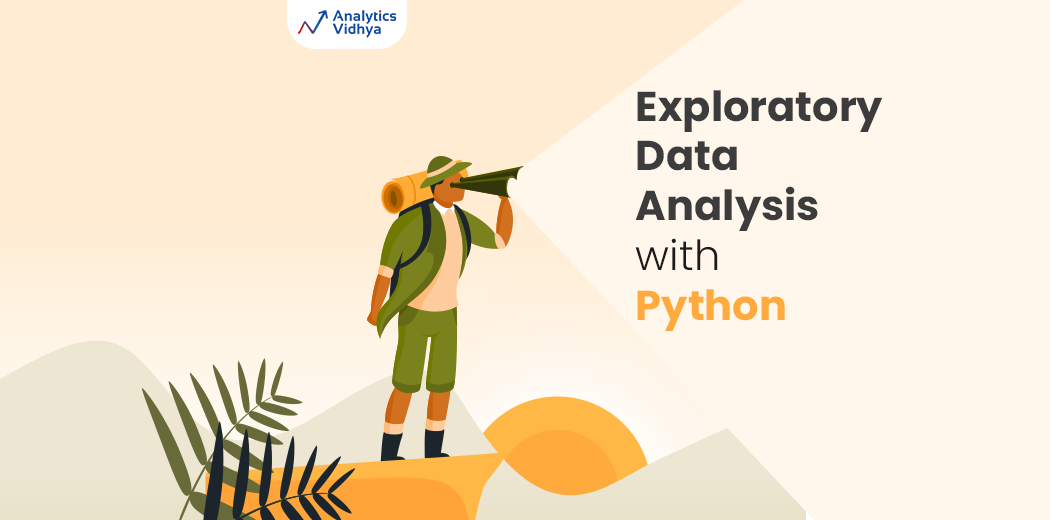

**Outliers_Detection**

An outlier is a data point in a data set that is distant from all other observations. A data point that lies outside the overall distribution of the dataset.
And for Outliers Detection we will make use of Boxplot(Boxplots help visualize the distribution of quantitative values in a field. They are also valuable for comparisons across different categorical variables or identifying outliers, if either of those exist in a dataset.) 

**INT_SQFT**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


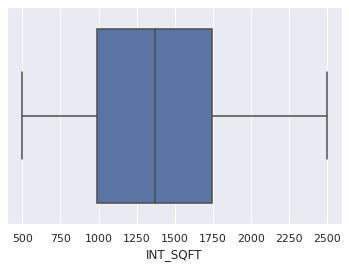

In [56]:
sns.boxplot(df['INT_SQFT'])

From above we can see that there are no Outliers in INT_SQFT column

**DIST_MAINROAD**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


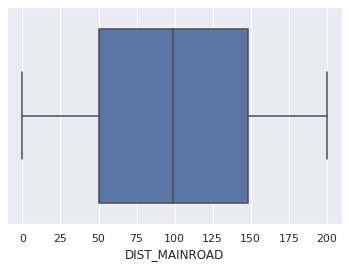

In [57]:
sns.boxplot(df['DIST_MAINROAD'])

From above we can see that there are no Outliers in DIST_MAINROAD column

**N_BEDROOM**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


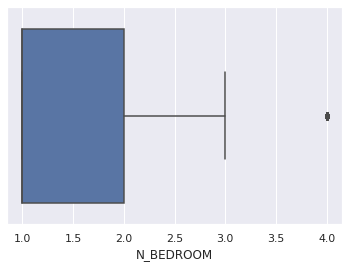

In [58]:
sns.boxplot(df['N_BEDROOM'])

From above we can see that there are only few Outliers which can be neglected in N_BEDROOM column

**N_BATHROOM**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


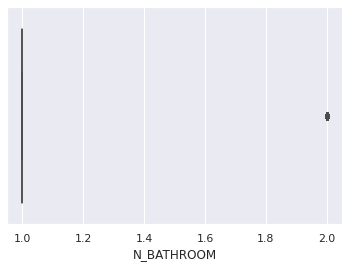

In [59]:
sns.boxplot(df['N_BATHROOM'])

From above we can see that there are only few Outliers which can be neglected in N_BATHROOM column

**N_ROOM**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


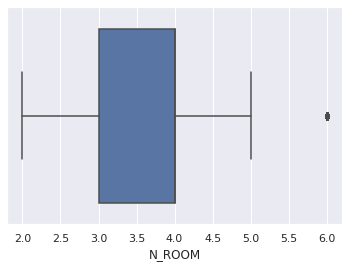

In [60]:
sns.boxplot(df['N_ROOM'])

From above we can see that there are only few Outliers which can be neglected in N_ROOM column

**QS_ROOMS**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


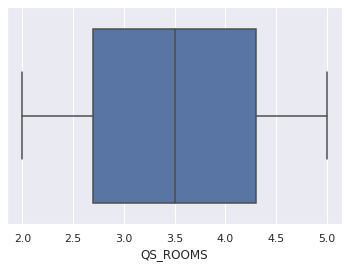

In [61]:
sns.boxplot(df['QS_ROOMS'])

From above we can see that there are no Outliers in QS_ROOMS column

**QS_BATHROOM**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


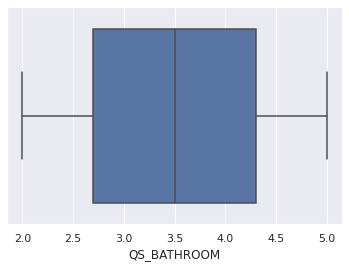

In [62]:
sns.boxplot(df['QS_BATHROOM'])

From above we can see that there are no Outliers in QS_BATHROOM column

**QS_BEDROOM**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


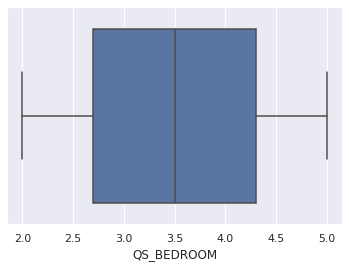

In [63]:
sns.boxplot(df['QS_BEDROOM'])

From above we can see that there are no Outliers in QS_BEDROOM column

**QS_OVERALL**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


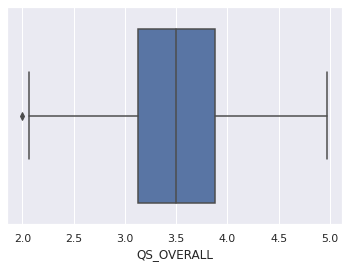

In [64]:
sns.boxplot(df['QS_OVERALL'])

From above we can see that there are only few Outliers which can be neglected in QS_OVERALL column

**Correlation Matrix**

A Correlation Matrix is use to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses

In [65]:
correlation = df.corr()

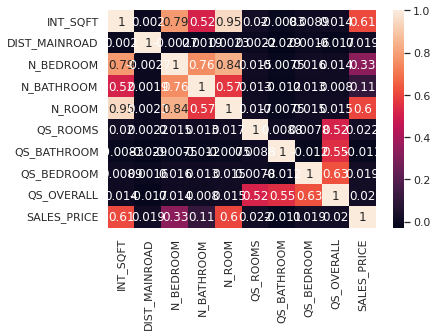

In [66]:
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns
            ,annot=True)

As we can see Correlation Matrix shows how strong the linear relationship between two variables are.If the Correlation is positive, that means both the variables are moving in same direction.Negative Correlation implies, when one variable increases the other variable decreases

**Pairplot**

Pairplot visualizes given data to find the relationship between them where the variables can be continuous or categorical

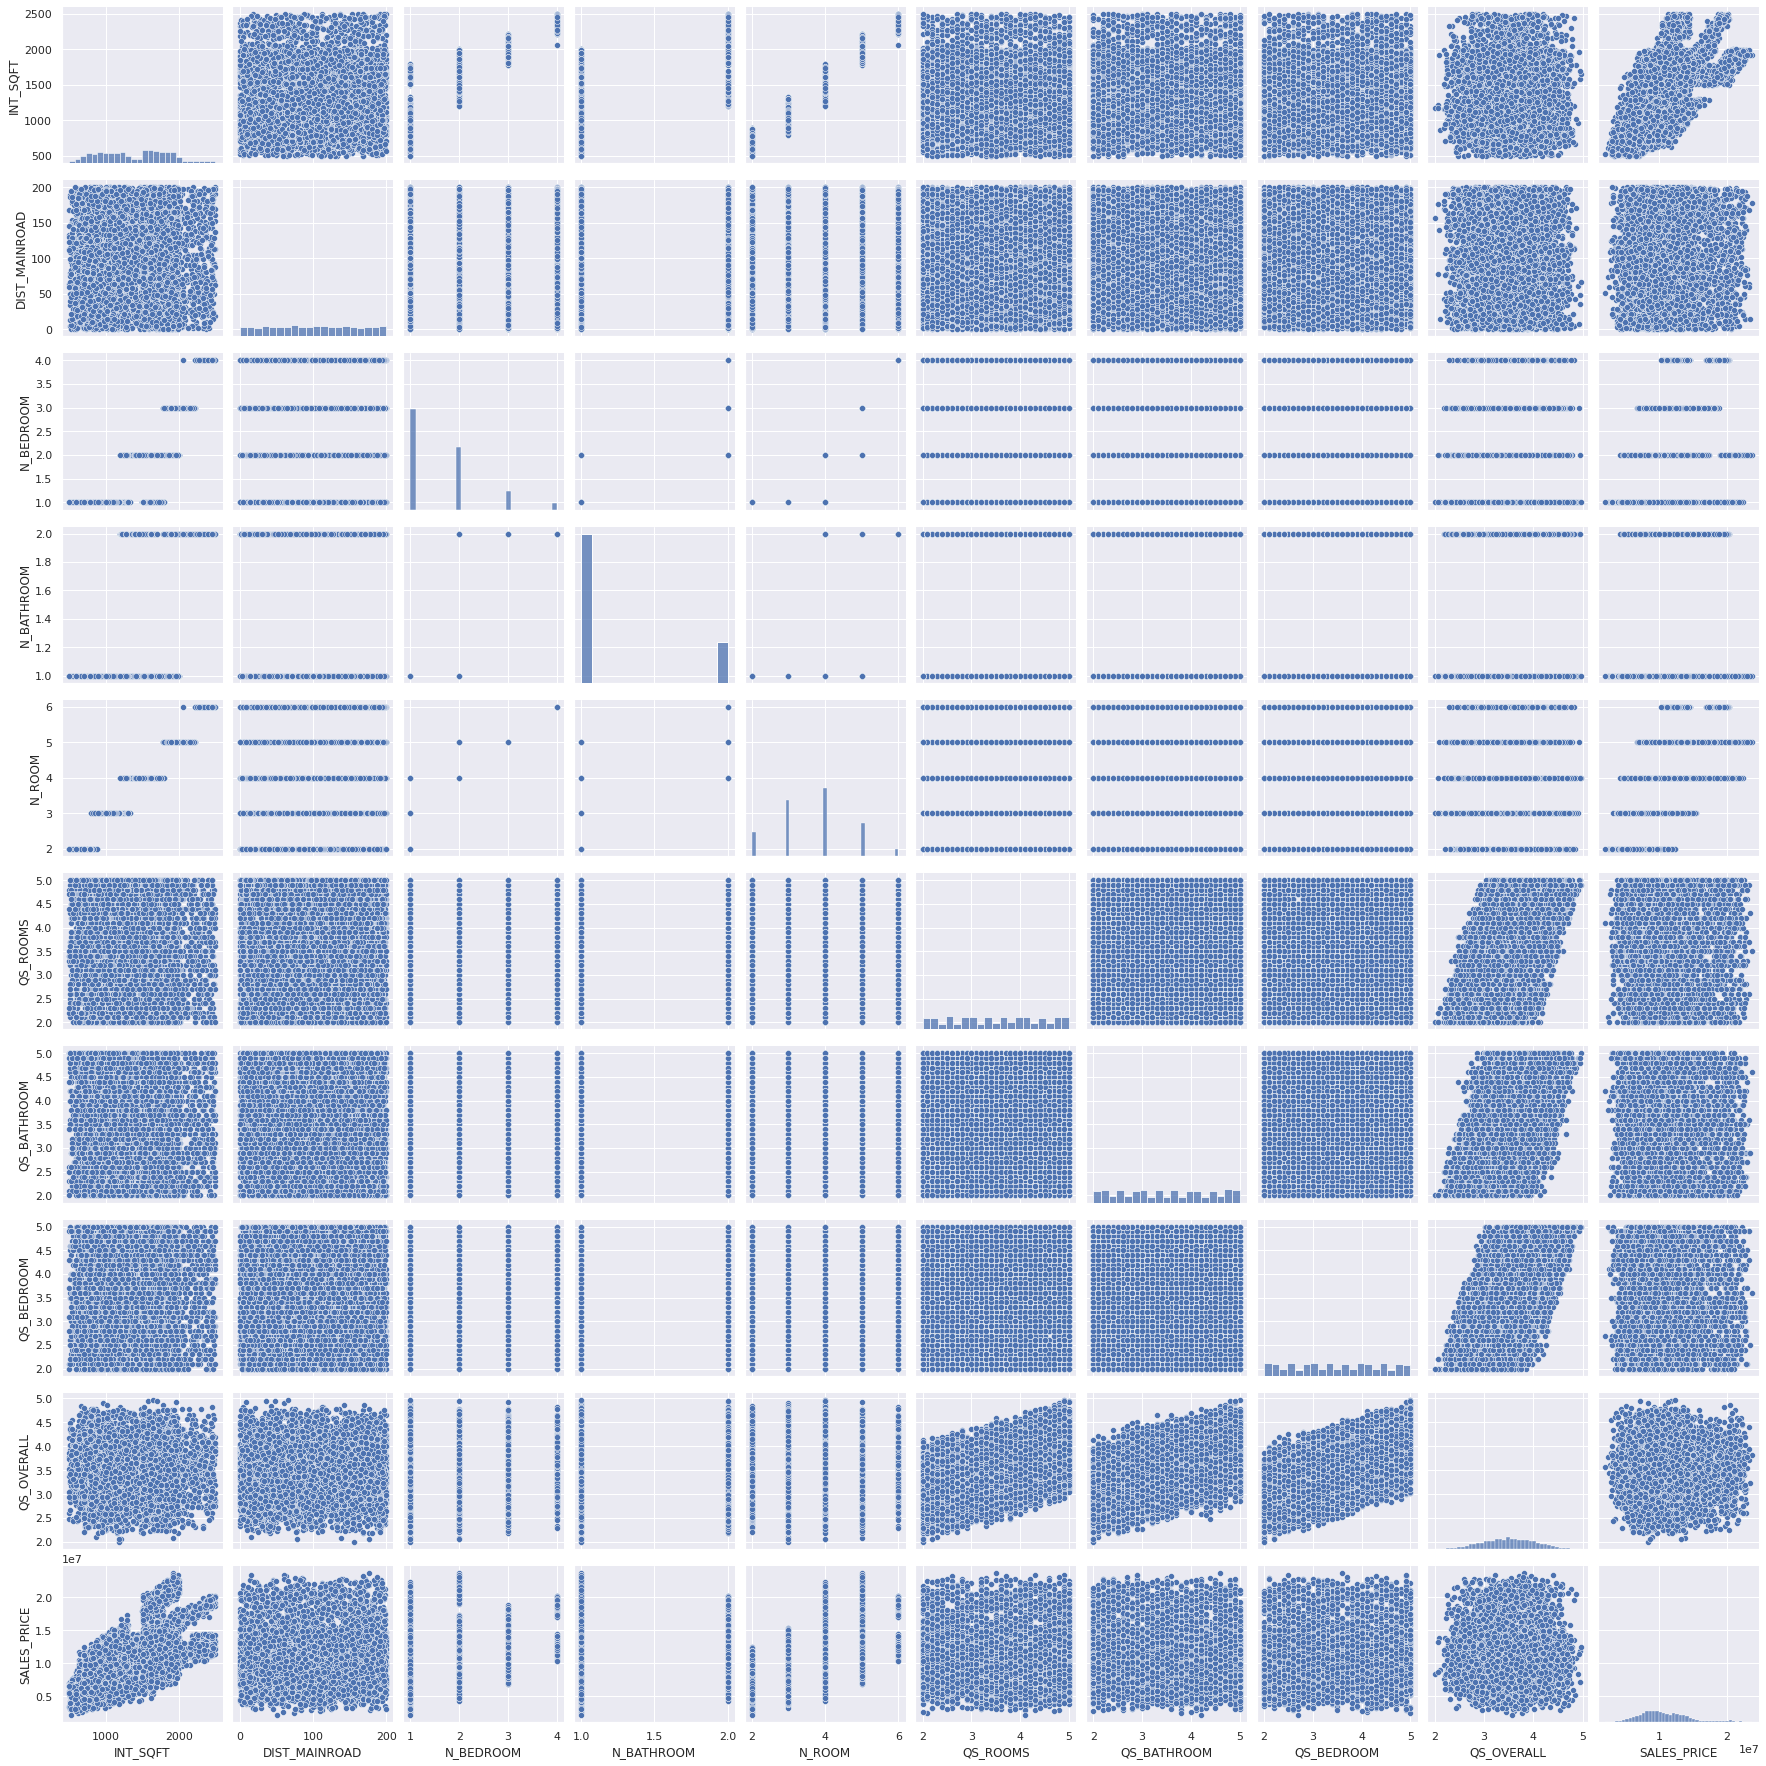

In [67]:
sns.pairplot(df)

As we can see a Pairplot, plot a pairwise relationships in a dataset.The Pairplot function creates a grid of Axes such that each variable in data will be shared in the Y-axis across a single row and in the X-axis across a single column

**Univariate Analysis**

For Univariate Analysis we will make use of Histogram(One of the most common statistical charts, histograms visualize the underlying frequency distribution of a given set of continuous data. You can easily summarize a large range of values by grouping/splitting the entire data set into defined intervals or classes commonly known as bins.) And we will look at our Target Variable SALES_PRICE


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


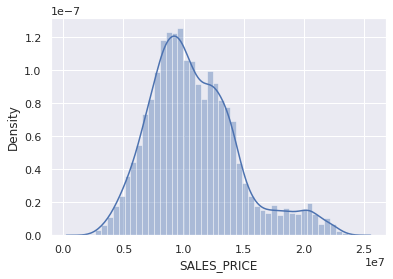

In [68]:
sns.distplot(df['SALES_PRICE']);

From above we can see that this is Normal Distribution, however there is slight deviation from Normal Distribution, it also has positive skewness which means it is skewed towards the left side and it has a peak so it shows peakness

In [69]:
#skewness and kurtosis
print('Skewness: %f' % df['SALES_PRICE'].skew())
print('Kurtosis: %f' % df['SALES_PRICE'].kurt())

Skewness: 0.773343
Kurtosis: 0.588129


A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.
And our value is 0.7 so it is moderately skewed.

When kurtosis is equal to 0, the distribution is platykurtic. A platykurtic distribution is flatter (less peaked) when compared with the normal distribution, with fewer values in its shorter (i.e. lighter and thinner) tails.
And our value is 0.5


**Bivariate Analysis**

For Bivariate Analysis we will make use of Scatter Plot(A scatter plot is a type of data visualization that shows the relationship between different variables. This data is shown by placing various data points between an x-axis and y-axis. Essentially, each of these data points looks “scattered” around the graph, giving this type of data visualization its name.).So we will look at relationship of our Feature Variables with our Target Variable

**INT_SQFT**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


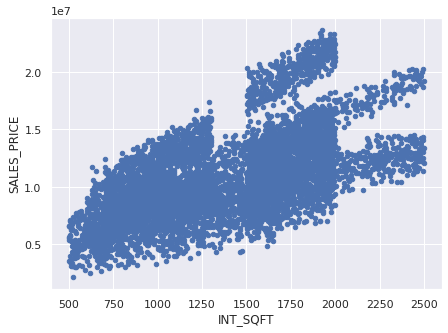

In [70]:
df.plot.scatter(x='INT_SQFT',y='SALES_PRICE', marker='o', figsize=(7,5))

From above we can see a Positive Correlation between INT_SQFT and SALES_PRICE

**DIST_MAINROAD**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


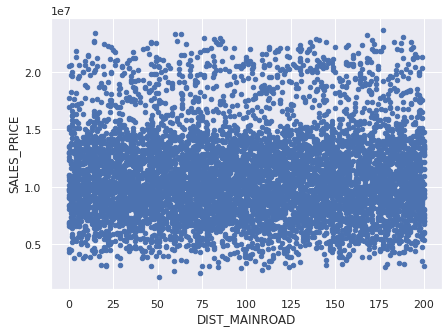

In [71]:
df.plot.scatter(x='DIST_MAINROAD',y='SALES_PRICE', marker='o', figsize=(7,5))

From above we can see very less Correlation between DIST_MAINROAD and SALES_PRICE

**N_BEDROOM**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


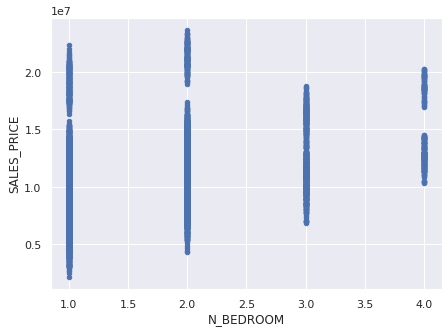

In [72]:
df.plot.scatter(x='N_BEDROOM',y='SALES_PRICE', marker='o', figsize=(7,5))

From above we can see very less Correlation between N_BEDROOM and SALES_PRICE

**N_BATHROOM**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


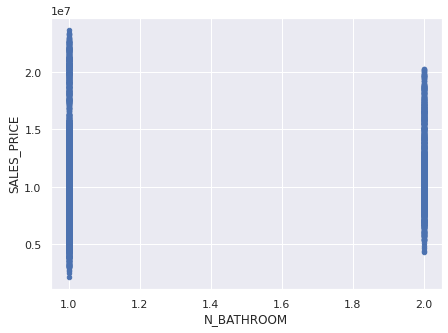

In [73]:
df.plot.scatter(x='N_BATHROOM',y='SALES_PRICE', marker='o', figsize=(7,5))

From above we can see very less Correlation between N_BATHROOM and SALES_PRICE

**N_ROOM**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


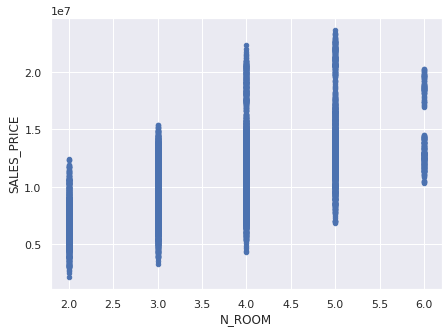

In [74]:
df.plot.scatter(x='N_ROOM',y='SALES_PRICE', marker='o', figsize=(7,5))

From above we can see very less Correlation between N_ROOM and SALES_PRICE

**QS_ROOMS**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


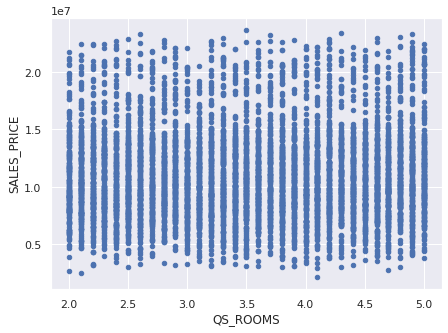

In [75]:
df.plot.scatter(x='QS_ROOMS',y='SALES_PRICE', marker='o', figsize=(7,5))

From above we can see very less Correlation between QS_ROOMS and SALES_PRICE

**QS_BATHROOM**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


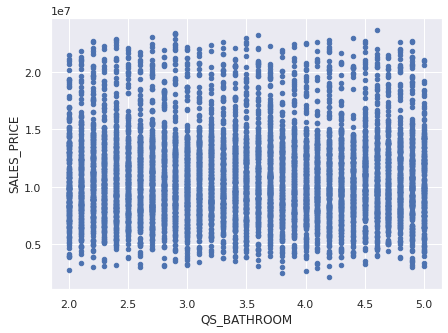

In [76]:
df.plot.scatter(x='QS_BATHROOM',y='SALES_PRICE', marker='o', figsize=(7,5))

From above we can see very less Correlation between QS_BATHROOM and SALES_PRICE

**QS_BEDROOM**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


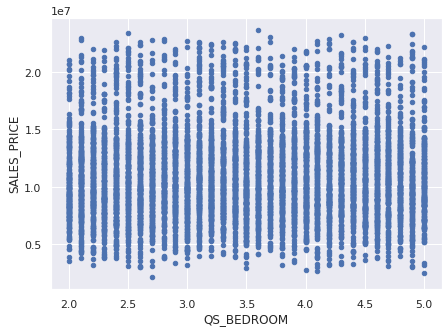

In [77]:
df.plot.scatter(x='QS_BEDROOM',y='SALES_PRICE', marker='o', figsize=(7,5))

From above we can see very less Correlation between QS_BEDROOM and SALES_PRICE

**QS_OVERALL**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


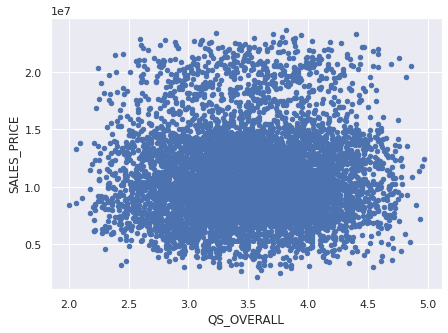

In [78]:
df.plot.scatter(x='QS_OVERALL',y='SALES_PRICE', marker='o', figsize=(7,5))

From above we can see very less Correlation between QS_OVERALL and SALES_PRICE

Now we will look at Categorical Variables such as AREA, SALE_COND, PARK_FACIL, BUILDTYPE, UTILITY_AVAIL, STREET, MZZONE visualize them for that will make use of barplot(A bar plot shows catergorical data as rectangular bars with the height of bars proportional to the value they represent. It is often used to compare between values of different categories in the data.) And we will see which sort of Encoding is needed.

**AREA**

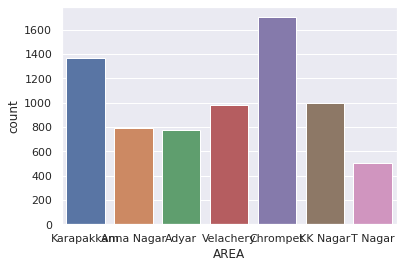

In [79]:
sns.countplot(x='AREA', data=df)

Countplot is used to Show the counts of observations in each categorical bin using bars. From above we see there are most projects done in Chrompet and least in T Nagar


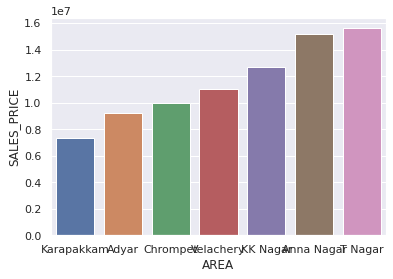

In [80]:
sns.barplot(x='AREA', y='SALES_PRICE', data=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values(by='SALES_PRICE'))

Here we see Linear Relationship between AREA and SALES_PRICE so we need to do Label Encoding

In [81]:
df.AREA=df.AREA.map({'Karapakkam':1, 'Adyar':2, 'Chrompet':3, 'Velachery':4, 'KK Nagar':5, 'Anna Nagar':6, 'T Nagar':7})

In [82]:
df.AREA.value_counts()

3    1702
1    1366
5     997
4     981
6     788
2     774
7     501
Name: AREA, dtype: int64

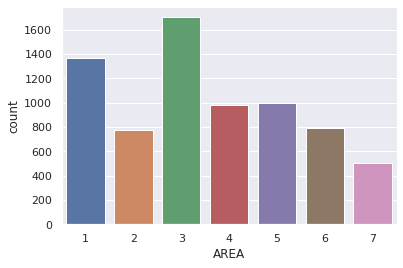

In [83]:
sns.countplot(x='AREA', data=df)

**SALE_COND**

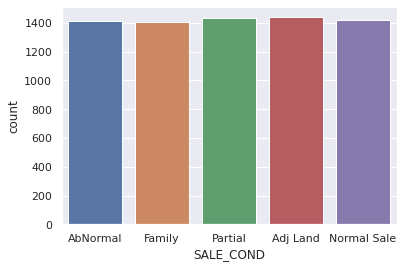

In [84]:
sns.countplot(x='SALE_COND', data=df)

Countplot is used to Show the counts of observations in each categorical bin using bars. From above we see there are most in Adj Land and least in Partial 


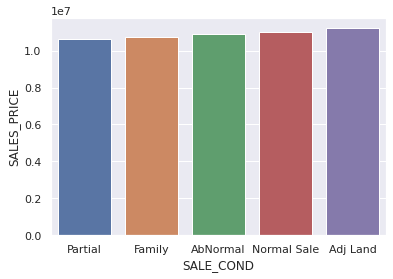

In [85]:
sns.barplot(x='SALE_COND', y='SALES_PRICE', data=df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values(by='SALES_PRICE'))

Here we see Linear Relationship between SALE_COND and SALES_PRICE so we need to do Label Encoding

In [86]:
df.SALE_COND=df.SALE_COND.map({'Partial':1, 'Family':2, 'AbNormal':3, 'Normal Sale':4, 'Adj Land':5})

In [87]:
df.SALE_COND.value_counts()

5    1439
1    1433
4    1423
3    1411
2    1403
Name: SALE_COND, dtype: int64

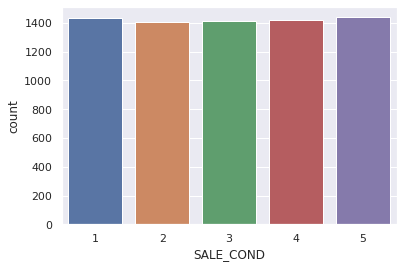

In [88]:
sns.countplot(x='SALE_COND', data=df)

**PARK_FACIL**

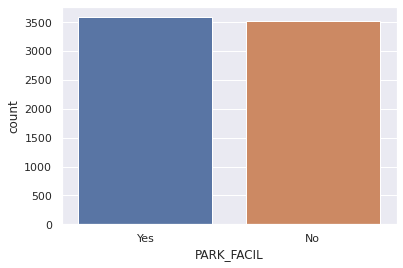

In [89]:
sns.countplot(x='PARK_FACIL', data=df)

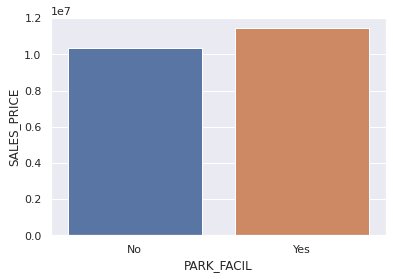

In [90]:
sns.barplot(x='PARK_FACIL', y='SALES_PRICE', data=df.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values(by='SALES_PRICE'))

Here we see Linear Relationship between SALE_COND and SALES_PRICE so we need to do Label Encoding



In [91]:
df.PARK_FACIL=df.PARK_FACIL.map({'No':0, 'Yes':1})

In [92]:
df.PARK_FACIL.value_counts()

1    3587
0    3522
Name: PARK_FACIL, dtype: int64

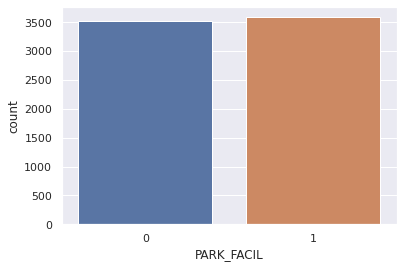

In [93]:
sns.countplot(x='PARK_FACIL', data=df)

**BUILDTYPE**

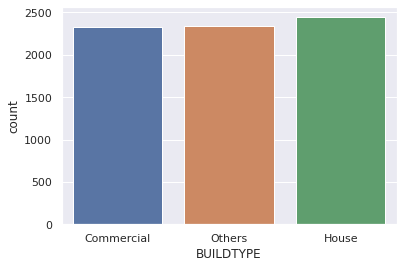

In [94]:
sns.countplot(x='BUILDTYPE', data=df)

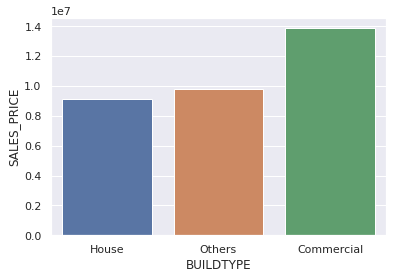

In [95]:
sns.barplot(x='BUILDTYPE', y='SALES_PRICE', data=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values(by='SALES_PRICE'))

From above we can see there is no Linear Trend between BUILDTYPE and SALES_PRICE. So we will go for One Hot Encoding

In [96]:
df = pd.concat([df,pd.get_dummies(df.BUILDTYPE)],axis=1)

In [97]:
df.drop(columns = ['BUILDTYPE'],inplace=True)

**UTILITY_AVAIL**

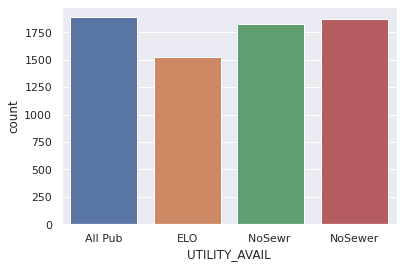

In [98]:
sns.countplot(x='UTILITY_AVAIL',data=df)

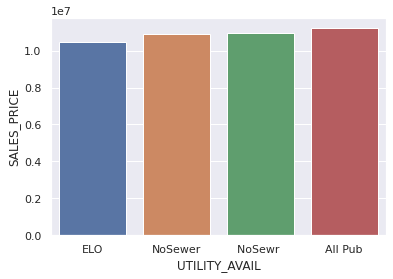

In [99]:
sns.barplot(x='UTILITY_AVAIL', y='SALES_PRICE', data=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values(by='SALES_PRICE'))

Here we see Linear Relationship between UTILITY_AVAIL and SALES_PRICE so we need to do Label Encoding



In [100]:
df.UTILITY_AVAIL=df.UTILITY_AVAIL.map({'ELO':1, 'NoSewer':2, 'NoSewr':3, 'All Pub':4})

In [101]:
print('Median:'+str(df.UTILITY_AVAIL.median()))
print('Mean:'+str(df.UTILITY_AVAIL.mean()))

Median:2.0
Mean:2.4265151515151517


In [102]:
df.UTILITY_AVAIL[df.UTILITY_AVAIL.isnull()]=df.UTILITY_AVAIL.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [103]:
df.UTILITY_AVAIL.value_counts()

2.0    3700
4.0    1887
1.0    1522
Name: UTILITY_AVAIL, dtype: int64

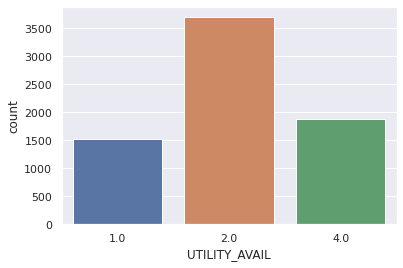

In [104]:
sns.countplot(x='UTILITY_AVAIL',data=df)

**STREET**

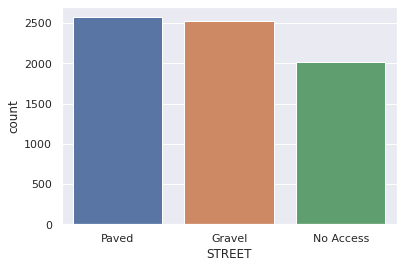

In [105]:
sns.countplot(x='STREET',data=df)

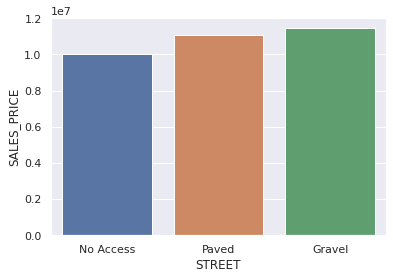

In [106]:
sns.barplot(x='STREET', y='SALES_PRICE', data=df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values(by='SALES_PRICE'))

Here we see Linear Relationship between STREET and SALES_PRICE so we need to do Label Encoding


In [107]:
df.STREET=df.STREET.map({'No Access':1, 'Paved':2, 'Gravel':3})

In [108]:
df.STREET.value_counts()

2    2572
3    2520
1    2017
Name: STREET, dtype: int64

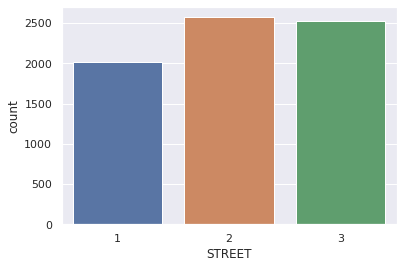

In [109]:
sns.countplot(x='STREET',data=df)

**MZZONE**

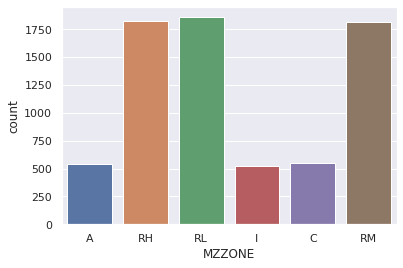

In [110]:
sns.countplot(x='MZZONE',data=df)

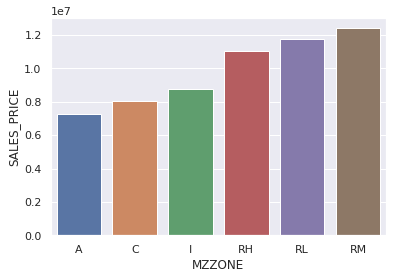

In [111]:
sns.barplot(x='MZZONE', y='SALES_PRICE', data=df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values(by='SALES_PRICE'))

From above we can see there is no Linear Trend between MZZONE and SALES_PRICE. So we will go for One Hot Encoding

In [112]:
df = pd.concat([df,pd.get_dummies(df.MZZONE)],axis=1)

In [113]:
df.drop(columns=['MZZONE'],inplace=True)

**DATE_BUILD**

In [114]:
df['DATE_BUILD']=df['DATE_BUILD'].dt.year

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


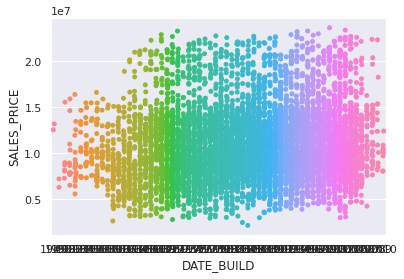

In [115]:
sns.stripplot(df['DATE_BUILD'], df['SALES_PRICE'],jitter=True)

**DATE_SALE**

In [116]:
df['DATE_SALE']=df['DATE_SALE'].dt.year

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


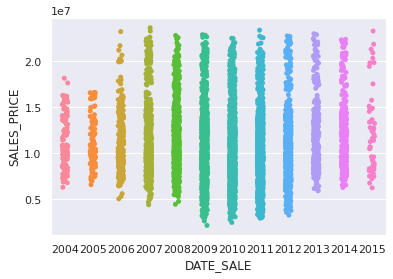

In [117]:
sns.stripplot(df['DATE_SALE'], df['SALES_PRICE'],jitter=True)

In [118]:
df['BUILDING_AGE']=df['DATE_SALE']-df['DATE_BUILD']

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


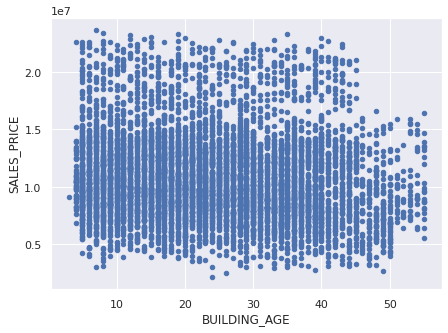

In [119]:
df.plot.scatter(x='BUILDING_AGE',y='SALES_PRICE', marker='o', figsize=(7,5))

In [120]:
df['PRICE_PER_SQFT']=(df['SALES_PRICE']/df['INT_SQFT']).astype(int)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


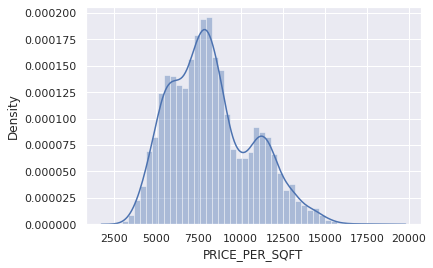

In [121]:
sns.distplot(df['PRICE_PER_SQFT'])

As we cannot use PRICE_PER_SQFT as a Feature we have drop this column

In [122]:
df.drop(columns = ['PRICE_PER_SQFT'],inplace=True)

In [123]:
df.head()

AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  \
0     1      1004       2011            131          1           1       3   
1     6      1986       2006             26          2           1       5   
2     2       909       2012             70          1           1       3   
3     4      1855       2010             14          3           2       5   
4     1      1226       2009             84          1           1       3   

   SALE_COND  PARK_FACIL  DATE_BUILD  ...  Commercial  House  Others  A  C  I  \
0          3           1        1967  ...           1      0       0  1  0  0   
1          3           0        1995  ...           1      0       0  0  0  0   
2          3           1        1992  ...           1      0       0  0  0  0   
3          2           0        1988  ...           0      0       1  0  0  1   
4          3           1        1979  ...           0      0       1  0  1  0   

   RH  RL  RM  BUILDING_AGE  
0   0   0   0            44  
1   1   0   0            11  
2   0   1   0            20  
3   0   0   0            22  
4   0   0   0            30  

[5 rows x 27 columns]

Due to Encoding Our Target Variable IS lost somewhere in the middile we need to get it back

In [124]:
sale=df.pop('SALES_PRICE')
df.head()

AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  \
0     1      1004       2011            131          1           1       3   
1     6      1986       2006             26          2           1       5   
2     2       909       2012             70          1           1       3   
3     4      1855       2010             14          3           2       5   
4     1      1226       2009             84          1           1       3   

   SALE_COND  PARK_FACIL  DATE_BUILD  ...  Commercial  House  Others  A  C  I  \
0          3           1        1967  ...           1      0       0  1  0  0   
1          3           0        1995  ...           1      0       0  0  0  0   
2          3           1        1992  ...           1      0       0  0  0  0   
3          2           0        1988  ...           0      0       1  0  0  1   
4          3           1        1979  ...           0      0       1  0  1  0   

   RH  RL  RM  BUILDING_AGE  
0   0   0   0            44  
1   1   0   0            11  
2   0   1   0            20  
3   0   0   0            22  
4   0   0   0            30  

[5 rows x 26 columns]

In [125]:
df.insert(26, 'SALES_PRICE', sale)

In [126]:
df.head()

AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  \
0     1      1004       2011            131          1           1       3   
1     6      1986       2006             26          2           1       5   
2     2       909       2012             70          1           1       3   
3     4      1855       2010             14          3           2       5   
4     1      1226       2009             84          1           1       3   

   SALE_COND  PARK_FACIL  DATE_BUILD  ...  House  Others  A  C  I  RH  RL  RM  \
0          3           1        1967  ...      0       0  1  0  0   0   0   0   
1          3           0        1995  ...      0       0  0  0  0   1   0   0   
2          3           1        1992  ...      0       0  0  0  0   0   1   0   
3          2           0        1988  ...      0       1  0  0  1   0   0   0   
4          3           1        1979  ...      0       1  0  1  0   0   0   0   

   BUILDING_AGE  SALES_PRICE  
0            44      7600000  
1            11     21717770  
2            20     13159200  
3            22      9630290  
4            30      7406250  

[5 rows x 27 columns]

#Spliting and Scaling the Data

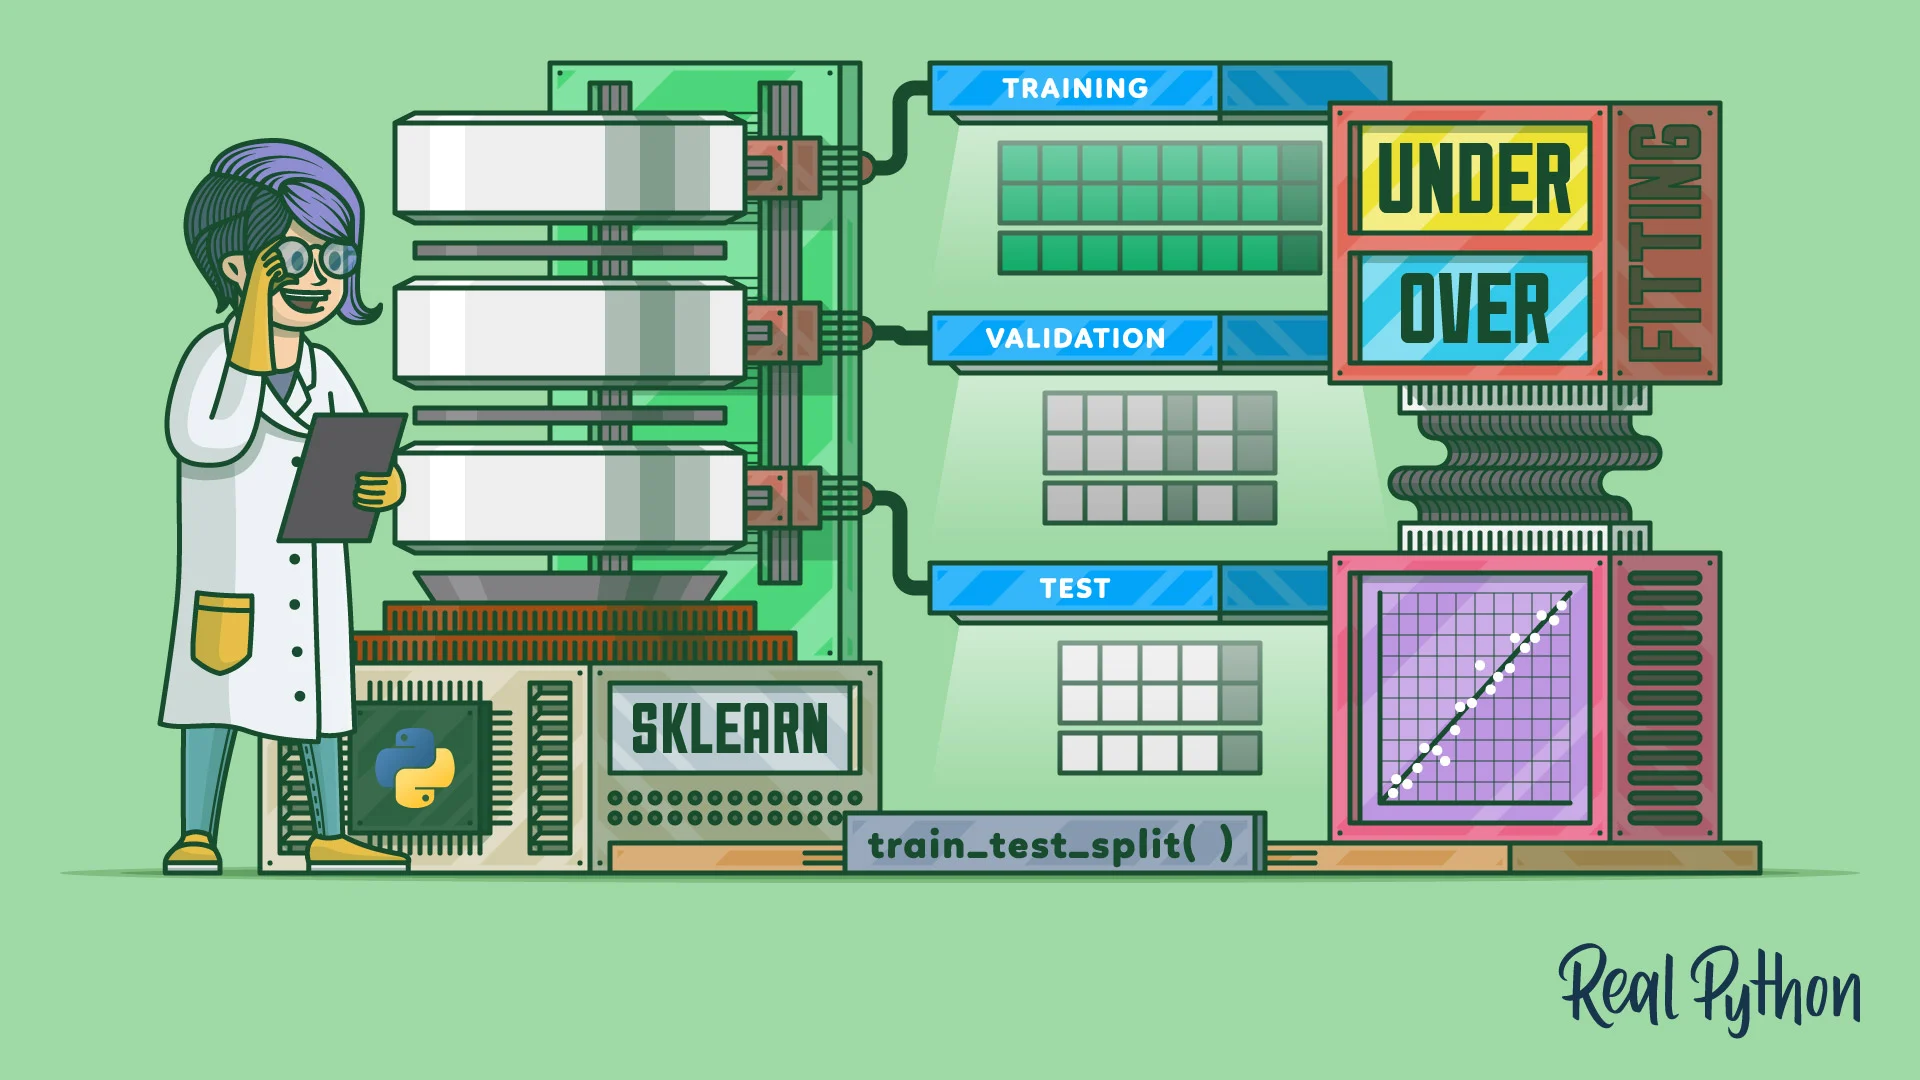

**Spliting the Data into Train and Test**

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['AREA','INT_SQFT','DATE_SALE','DIST_MAINROAD','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','DATE_BUILD','UTILITY_AVAIL','STREET','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL','A','C','I','RH','RL','RM','Commercial','House','Others','BUILDING_AGE']],df['SALES_PRICE'],test_size=0.2)  

**Feature Scaling**

In [128]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Model Building

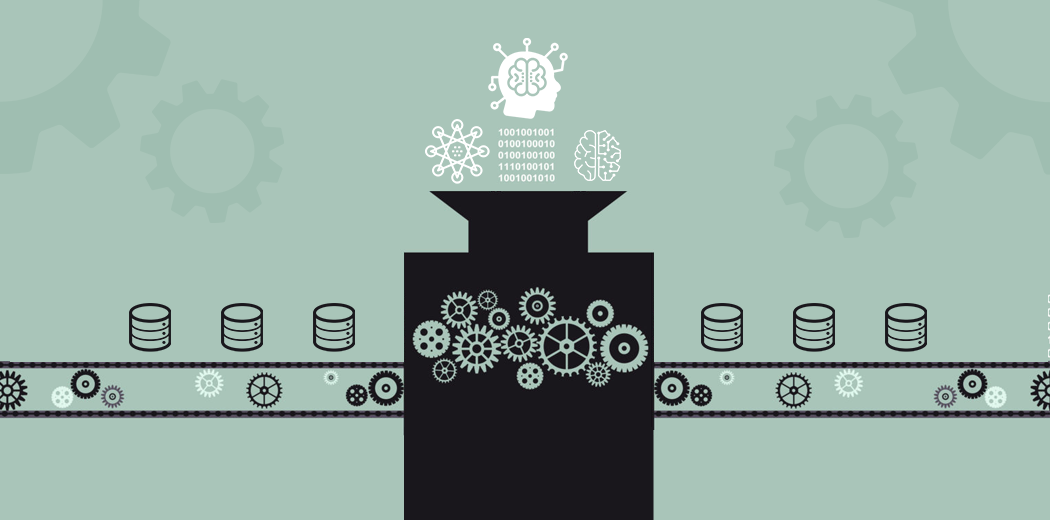

**Linear Regression**

[ 9689889.90097183  3469217.90097183 16724001.90097183 ...
  2901793.90097183  9631265.90097183  5012513.90097183]


Actual Value  Predicted Value    Difference
262        9107430     9.689890e+06 -5.824599e+05
1531       5054675     3.469218e+06  1.585457e+06
6017      19103360     1.672400e+07  2.379358e+06
3021       7855000     8.004514e+06 -1.495139e+05
322        7451690     6.179874e+06  1.271816e+06

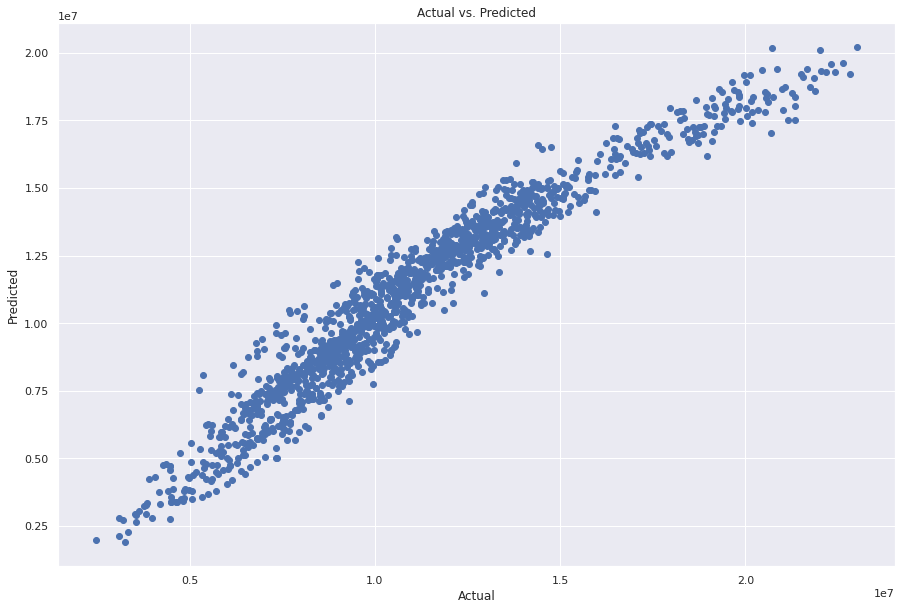

In [130]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(X_train,y_train)
y_pred=ml.predict(X_test)
print(y_pred) 
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
pred_y_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_y_df[0:5]

In [131]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9259386576487136

**Decision Tree**

In [132]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='mse')
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)
pred

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


array([ 8540670.,  4456285., 19789040., ...,  4678875.,  9778420.,
        6002600.])

In [133]:
regressor.score(X_test, y_test)

0.9602873935156752

In [134]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.9602873935156752

**XG Boost**

[16:46:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


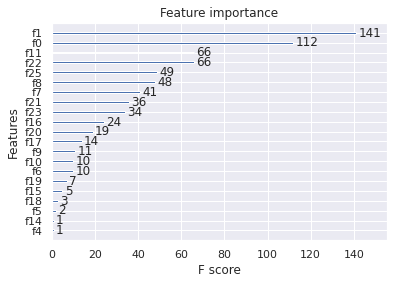

In [136]:
from xgboost import XGBClassifier
from xgboost import XGBRegressor
import xgboost as xgb
model = XGBRegressor()
model.fit(X_train, y_train)
xgb.plot_importance(model, ax=plt.gca(),)

In [139]:
pred = model.predict(X_test)
print(pred)

[ 9123202.   5348176.  19250268.  ...  3430607.2  9877068.   6892269.5]


In [140]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.9905839989879504

If we compare r2_score of each model we can see that XGBoost Model is the best fit but we will go with Linear Regression Model because it is easily interpritable

**Final Result**

In [150]:
s = np.std(X_train)
interval = 1.96*s
lower, upper = pred - interval, pred + interval
print(f'Pridicted Output Range Between:{lower} and {upper}')

Pridicted Output Range Between:[ 9123200.   5348174.  19250266.  ...  3430605.2  9877066.   6892267.5] and [ 9123204.   5348178.  19250270.  ...  3430609.2  9877070.   6892271.5]


Here we got the Range and we used 1.96 because, The value of 1.96 is based on the fact that 95% of the area of a normal distribution is within 1.96 standard deviations of the mean, 12 is the standard error of the mean.
